In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
series = np.loadtxt("exemplo_nn.dat")
seg_result = pd.read_csv("file1.csv", index_col = 0)
print(seg_result)
print(series)

         start  finish      mean      sigma
segment                                    
1            1      58   951.062    683.746
2           59     105   917.055    699.383
3          106     166   976.092    997.489
4          167     188   844.309    621.286
5          189     259   766.107   2052.730
6          260     308   900.251   1718.400
7          309     353   828.797   2080.720
8          354     444   911.053  10978.700
9          445     507   794.232   2719.660
10         508     598   835.232   2002.000
11         599     641   798.182   1249.000
12         642     681   761.191   1007.770
13         682     758   630.169   3118.750
14         759     794   773.222   1735.120
15         795     821   845.776   1218.870
16         822     917   952.885   1952.260
17         918     957   919.925   3494.820
18         958     998   878.542   1620.770
19         999    1018   962.892   1984.410
20        1019    1040   899.859    718.694
21        1041    1120   977.540

<IPython.core.display.Javascript object>


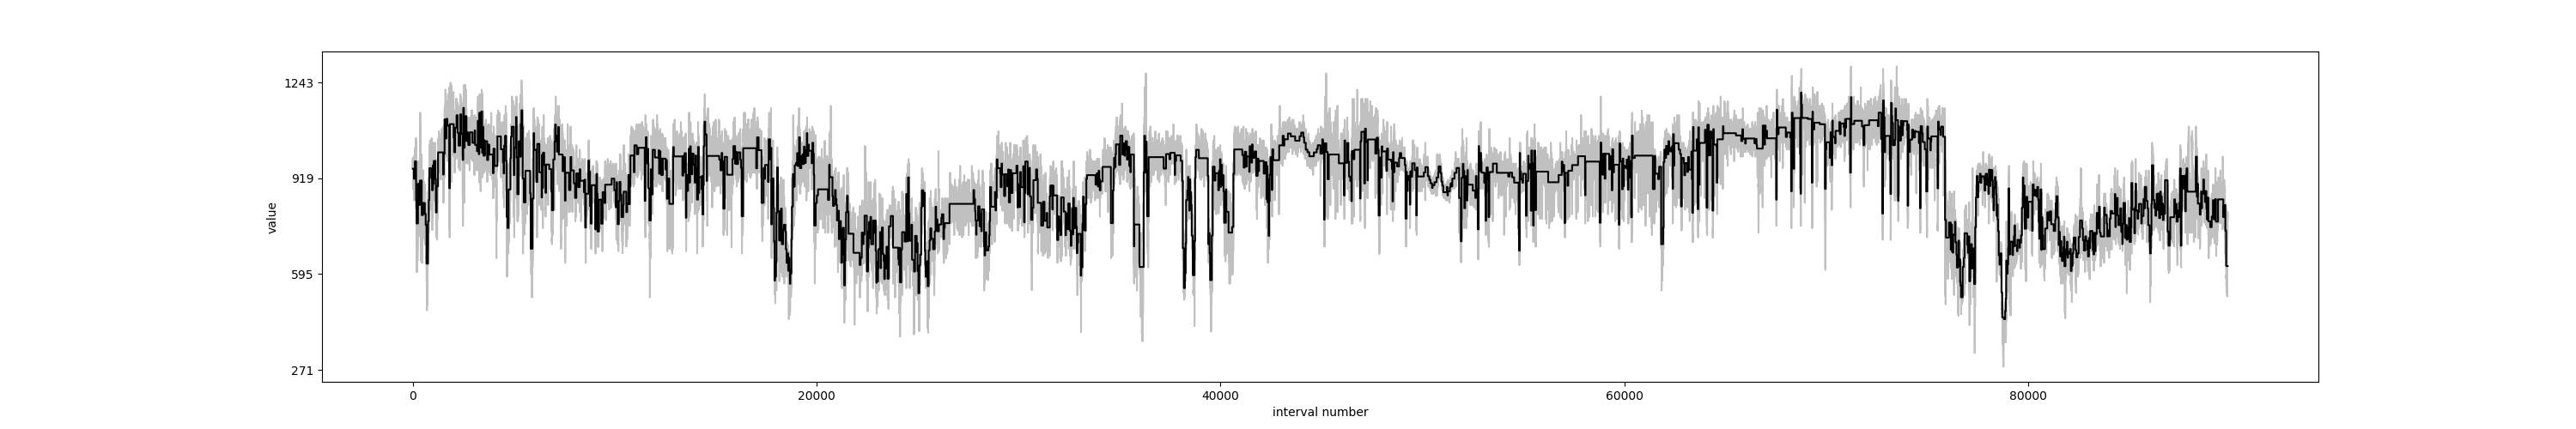

In [143]:
means = np.zeros(0)
for i in seg_result.index:
    size = seg_result.loc[i,'finish'] - seg_result.loc[i, 'start'] + 1
    vec = np.full([size], seg_result.loc[i, 'mean'])
    means = np.concatenate((means,vec))

fig = plt.figure()
fig.set_size_inches(30, 5)
ax1 = fig.add_subplot(1,1,1)
series_plot = ax1.plot(series, 'silver')
ax1.plot(means, 'k-', drawstyle='steps-post', label='step-post')
ax1.set_xticks(range(0, series.size, 20000))
ax1.set_yticks(range(int(series.min()-10), int(series.max()), int(series.max()/4)))
ax1.set_xlabel('interval number')
ax1.set_ylabel('value')
fig.savefig('segmentos.png')

<IPython.core.display.Javascript object>


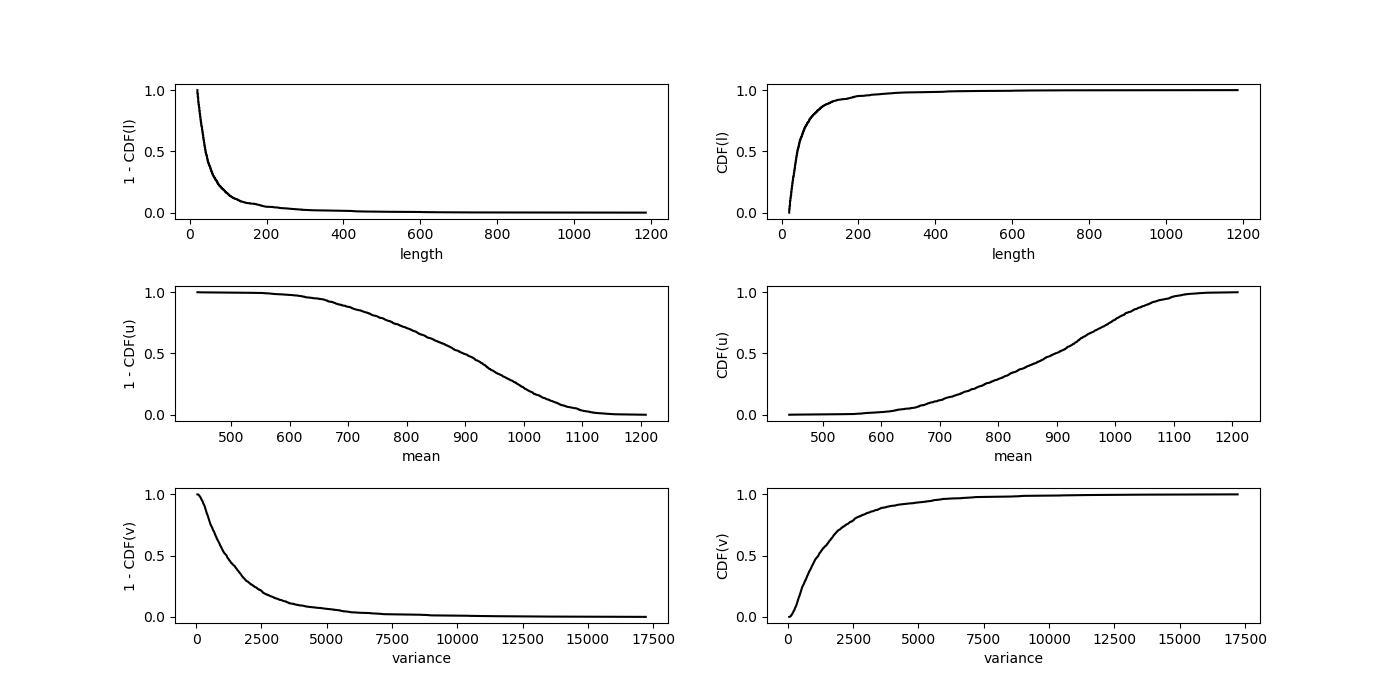

In [181]:
# Distribuição acumulada
lengths = np.zeros(0)

for i in seg_result.index:
    size = seg_result.loc[i, 'finish'] - seg_result.loc[i, 'start'] + 1
    lengths = np.concatenate((lengths, [size]))
    
lengths_s = np.sort(lengths)
Fn = -np.sort(-np.arange(lengths.size)/float(lengths.size))
mean = np.sort(seg_result['mean'].values)
variance = np.sort(seg_result['sigma'].values)

fig = plt.figure()
fig.set_size_inches(14, 7)
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('length')
ax1.set_ylabel('1 - CDF(l)')
ax3.set_xlabel('mean')
ax3.set_ylabel('1 - CDF(u)')
ax5.set_xlabel('variance')
ax5.set_ylabel('1 - CDF(v)')
ax2.set_xlabel('length')
ax2.set_ylabel('CDF(l)')
ax4.set_xlabel('mean')
ax4.set_ylabel('CDF(u)')
ax6.set_xlabel('variance')
ax6.set_ylabel('CDF(v)')

ax1.plot(lengths_s, Fn, 'k')
ax3.plot(mean, Fn, 'k')
ax5.plot(variance, Fn, 'k')
ax2.plot(lengths_s, np.sort(Fn), 'k')
ax4.plot(mean, np.sort(Fn), 'k')
ax6.plot(variance, np.sort(Fn), 'k')
fig.savefig('cumulative_distributions.png')

<IPython.core.display.Javascript object>


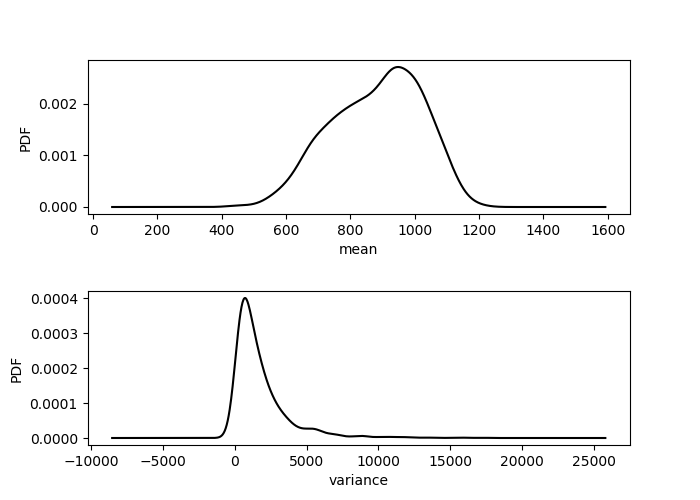

In [27]:
fig = plt.figure()
fig.set_size_inches(7, 5)
ax1 = fig.add_subplot(2,1,1)
seg_result['mean'].plot.density(color = 'k')
ax2 = fig.add_subplot(2,1,2)
seg_result['sigma'].plot.density(color = 'k')
fig.subplots_adjust(hspace=0.5)

ax1.set_xlabel('mean')
ax2.set_xlabel('variance')
ax1.set_ylabel('PDF')
ax2.set_ylabel('PDF')
fig.savefig('probability_distributions.png')

<IPython.core.display.Javascript object>


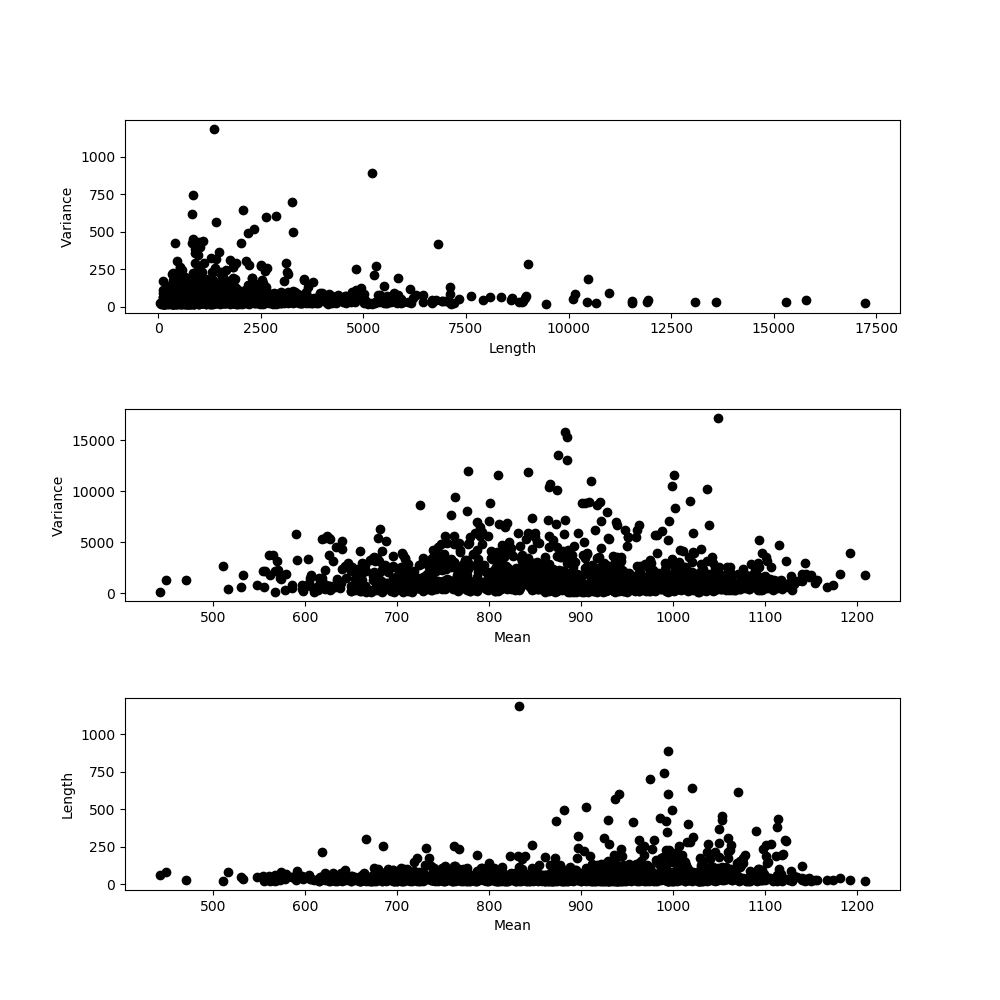

In [23]:
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.set_xlabel("Length"); ax1.set_ylabel("Variance")
ax2.set_xlabel("Mean"); ax2.set_ylabel("Variance")
ax3.set_xlabel("Mean"); ax3.set_ylabel("Length")

l = (seg_result['finish'] - seg_result['start'] + 1).values

ax1.scatter(seg_result['sigma'].values, l, color = 'k')
ax2.scatter(seg_result['mean'].values, seg_result['sigma'].values, color = 'k')
ax3.scatter(seg_result['mean'].values, l, color = 'k')

<IPython.core.display.Javascript object>


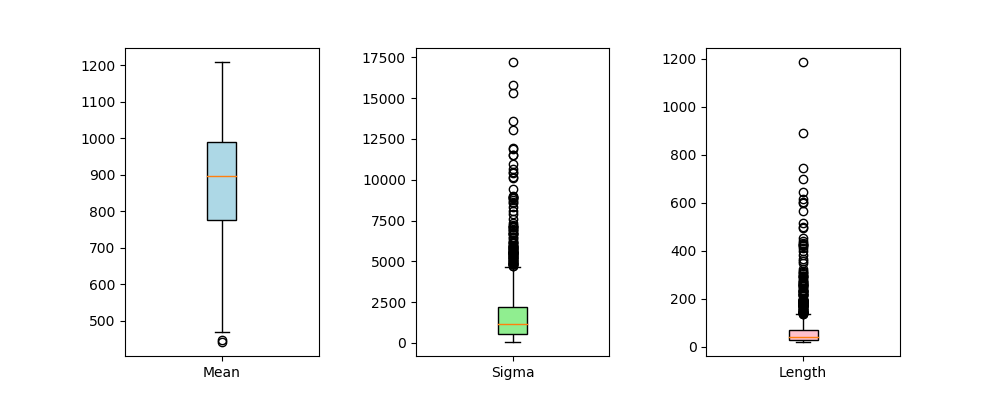

[None]

In [83]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
fig.set_size_inches(10, 4)
fig.subplots_adjust(wspace=0.5)

bplot1 = ax1.boxplot([seg_result['mean'].values], labels = ['Mean'], patch_artist = True)
bplot2 = ax2.boxplot([seg_result['sigma'].values], labels = ['Sigma'], patch_artist = True)
bplot3 = ax3.boxplot([l], labels = ['Length'], patch_artist = True)

bplot1['boxes'][0].set(facecolor='lightblue')
bplot2['boxes'][0].set(facecolor='lightgreen')
bplot3['boxes'][0].set(facecolor='pink')

plt.setp(bplot['medians'], color = "black")

<IPython.core.display.Javascript object>


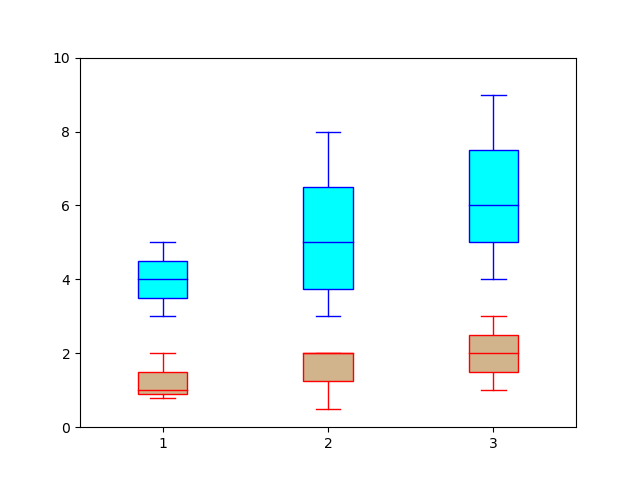

(0, 10)

In [56]:
import matplotlib.pyplot as plt

def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       

example_data1 = [[1,2,0.8], [0.5,2,2], [3,2,1]]
example_data2 = [[5,3, 4], [6,4,3,8], [6,4,9]]

fig, ax = plt.subplots()
draw_plot(example_data1, 'red', 'tan')
draw_plot(example_data2, 'blue', 'cyan')
ax.set_ylim(0, 10)

In [17]:
seg_result['mean'].value_counts().sort_values()

1036.580    1
942.090     1
661.484     1
725.801     1
776.199     1
736.688     1
843.055     1
966.640     1
1208.990    1
964.559     1
835.508     1
591.032     1
939.064     1
698.661     1
898.334     1
844.793     1
969.666     1
1063.160    1
822.924     1
955.688     1
1051.820    1
1113.990    1
904.220     1
646.597     1
866.462     1
725.492     1
529.936     1
1073.770    1
1064.170    1
959.737     1
           ..
943.428     1
796.494     1
968.751     1
926.964     1
870.070     1
1105.470    1
1016.770    1
917.912     1
865.665     1
1117.780    1
935.401     1
930.044     1
858.943     1
1019.190    1
903.578     1
938.978     1
928.599     1
1013.930    1
1060.670    1
1023.330    1
846.580     1
914.064     2
1016.390    2
1062.500    2
1000.200    2
962.892     2
1027.850    2
889.758     2
1001.360    2
672.217     2
Name: mean, Length: 1309, dtype: int64